# Particle Swarm Optimization for Numerical Optimization Problems

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time
import warnings

In [5]:
def f1_sphere(x):
    """Sphere Function (Optimal = 0)."""
    return np.sum(np.square(x))

def f2_rosenbrock(x):
    """Rosenbrock Function (Optimal = 0)."""
    return np.sum(100.0 * (x[1:] - x[:-1]**2.0)**2.0 + (1 - x[:-1])**2.0)

In [6]:
def run_pso_optimizer(function, num_particles, iterations, dimensions, w, c1, c2, use_inertia_weight=True):
    """
    Core PSO engine that runs a single trial.
    'use_inertia_weight' controls if it uses Original PSO or PSOw formula.
    """
    # Initialize particle positions (swarm) randomly
    particles_pos = np.random.rand(num_particles, dimensions) * 20 - 10  # Range [-10, 10]
    # Initialize particle velocities
    particles_vel = np.random.rand(num_particles, dimensions) * 0.1
    
    # Initialize pbest (personal best)
    pbest_pos = np.copy(particles_pos)
    pbest_fitness = np.array([function(p) for p in pbest_pos])
    
    # Initialize gbest (global best)
    gbest_idx = np.argmin(pbest_fitness)
    gbest_pos = pbest_pos[gbest_idx]
    gbest_fitness = pbest_fitness[gbest_idx]
    
    # Store convergence history for plotting
    convergence_history = []
    
    # Iteration loop
    for _ in range(iterations):
        for i in range(num_particles):
            # Calculate new velocity
            r1 = np.random.rand(dimensions)
            r2 = np.random.rand(dimensions)
            
            # Velocity update formulas
            cognitive_velocity = c1 * r1 * (pbest_pos[i] - particles_pos[i])
            social_velocity = c2 * r2 * (gbest_pos - particles_pos[i])
            
            if use_inertia_weight:
                # PSOw Formula (Shi & Eberhart, 1998)
                new_velocity = w * particles_vel[i] + cognitive_velocity + social_velocity
            else:
                # Original PSO Formula (Kennedy & Eberhart, 1995)
                new_velocity = particles_vel[i] + cognitive_velocity + social_velocity
                
            # Apply new velocity to update position
            particles_vel[i] = new_velocity
            particles_pos[i] = particles_pos[i] + new_velocity
            
            # --- Fitness Evaluation ---
            current_fitness = function(particles_pos[i])
            
            # Update pbest
            if current_fitness < pbest_fitness[i]:
                pbest_fitness[i] = current_fitness
                pbest_pos[i] = particles_pos[i]
            
            # Update gbest
            if current_fitness < gbest_fitness:
                gbest_fitness = current_fitness
                gbest_pos = particles_pos[i]
        
        convergence_history.append(gbest_fitness)
        
    # Return the best fitness found in this RUN
    return gbest_fitness, convergence_history

In [7]:
def run_original_pso(function, particles, iterations, dimensions=10):
    """
    Wrapper for 'Original PSO'.
    w is ignored, c1=2.0, c2=2.0
    """
    # c1 and c2 set to classic values
    # w (inertia) is ignored by setting use_inertia_weight=False
    fitness, history = run_pso_optimizer(function, particles, iterations, dimensions, 
                                         w=0.0, c1=2.0, c2=2.0, use_inertia_weight=False)
    return fitness, history

def run_psow(function, particles, iterations, dimensions=10):
    """
    Wrapper for 'PSOw' (Inertia Weight).
    w=0.9, c1=2.0, c2=2.0
    """
    # Using w=0.9 (common value) and use_inertia_weight=True
    fitness, history = run_pso_optimizer(function, particles, iterations, dimensions,
                                         w=0.9, c1=2.0, c2=2.0, use_inertia_weight=True)
    return fitness, history

In [8]:
start_time = time.time()

# Experiment parameters
num_runs = 20        # Your "20 data" requirement for statistics
num_particles = 20   # Your "20 data" requirement for population
num_iterations = 100
dimensions = 10      # Standard dimension for this test

# Benchmark functions (using Python function handles)
functions_to_test = {
    "f1_sphere": f1_sphere,
    "f2_rosenbrock": f2_rosenbrock
}

# Results storage
results = {
    "original_pso": {"f1_sphere": [], "f2_rosenbrock": []},
    "psow": {"f1_sphere": [], "f2_rosenbrock": []}
}
# Convergence history storage
convergence_data = {
    "original_pso": {"f1_sphere": [], "f2_rosenbrock": []},
    "psow": {"f1_sphere": [], "f2_rosenbrock": []}
}

In [9]:
print(f"Starting experiment: {num_runs} independent runs...")
print(f"Parameters: Particles={num_particles}, Iterations={num_iterations}, Dimensions={dimensions}")
print("-" * 30)

for i in range(num_runs):
    print(f"Running Run #{i+1}/{num_runs}...")
    
    for func_name, func_obj in functions_to_test.items():
        # --- Run Original PSO ---
        fit_pso, hist_pso = run_original_pso(func_obj, particles=num_particles, iterations=num_iterations, dimensions=dimensions)
        results["original_pso"][func_name].append(fit_pso)
        convergence_data["original_pso"][func_name].append(hist_pso)

        # --- Run PSOw (Benchmark) ---
        fit_psow, hist_psow = run_psow(func_obj, particles=num_particles, iterations=num_iterations, dimensions=dimensions)
        results["psow"][func_name].append(fit_psow)
        convergence_data["psow"][func_name].append(hist_psow)

print("...Experiment Complete.")
print(f"Total time taken: {time.time() - start_time:.2f} seconds")

Starting experiment: 20 independent runs...
Parameters: Particles=20, Iterations=100, Dimensions=10
------------------------------
Running Run #1/20...
Running Run #2/20...
Running Run #3/20...
Running Run #4/20...
Running Run #5/20...
Running Run #6/20...
Running Run #7/20...
Running Run #8/20...
Running Run #9/20...
Running Run #10/20...
Running Run #11/20...
Running Run #12/20...
Running Run #13/20...
Running Run #14/20...
Running Run #15/20...
Running Run #16/20...
Running Run #17/20...
Running Run #18/20...
Running Run #19/20...
Running Run #20/20...
...Experiment Complete.
Total time taken: 26.03 seconds


In [10]:
print("\n--- 5. STATISTICAL RESULTS (from 20 runs) ---")

# Convert results to NumPy arrays for easy statistics
results["original_pso"]["f1_sphere"] = np.array(results["original_pso"]["f1_sphere"])
results["original_pso"]["f2_rosenbrock"] = np.array(results["original_pso"]["f2_rosenbrock"])
results["psow"]["f1_sphere"] = np.array(results["psow"]["f1_sphere"])
results["psow"]["f2_rosenbrock"] = np.array(results["psow"]["f2_rosenbrock"])

# Display table header
print(f"{'Function':<15} | {'Algorithm':<15} | {'Mean':<12} | {'Std. Dev':<12} | {'Min (Best)':<12}")
print("-" * 69)

# Function 1: Sphere
print(f"{'f1 (Sphere)':<15} | {'Original PSO':<15} | {np.mean(results['original_pso']['f1_sphere']):<12.2e} | {np.std(results['original_pso']['f1_sphere']):<12.2e} | {np.min(results['original_pso']['f1_sphere']):<12.2e}")
print(f"{'f1 (Sphere)':<15} | {'PSOw (Benchmark)':<15} | {np.mean(results['psow']['f1_sphere']):<12.2e} | {np.std(results['psow']['f1_sphere']):<12.2e} | {np.min(results['psow']['f1_sphere']):<12.2e}")

# Function 2: Rosenbrock
print(f"{'f2 (Rosenbrock)':<15} | {'Original PSO':<15} | {np.mean(results['original_pso']['f2_rosenbrock']):<12.2e} | {np.std(results['original_pso']['f2_rosenbrock']):<12.2e} | {np.min(results['original_pso']['f2_rosenbrock']):<12.2e}")
print(f"{'f2 (Rosenbrock)':<15} | {'PSOw (Benchmark)':<15} | {np.mean(results['psow']['f2_rosenbrock']):<12.2e} | {np.std(results['psow']['f2_rosenbrock']):<12.2e} | {np.min(results['psow']['f2_rosenbrock']):<12.2e}")


--- 5. STATISTICAL RESULTS (from 20 runs) ---
Function        | Algorithm       | Mean         | Std. Dev     | Min (Best)  
---------------------------------------------------------------------
f1 (Sphere)     | Original PSO    | 1.11e+02     | 4.26e+01     | 5.00e+01    
f1 (Sphere)     | PSOw (Benchmark) | 7.96e+01     | 3.42e+01     | 1.26e+01    
f2 (Rosenbrock) | Original PSO    | 1.99e+05     | 1.06e+05     | 5.18e+04    
f2 (Rosenbrock) | PSOw (Benchmark) | 2.08e+05     | 1.30e+05     | 2.56e+04    



--- 6. Generating Convergence Plots ---
Convergence plots saved to 'Experiment2_Convergence_Plots.png'


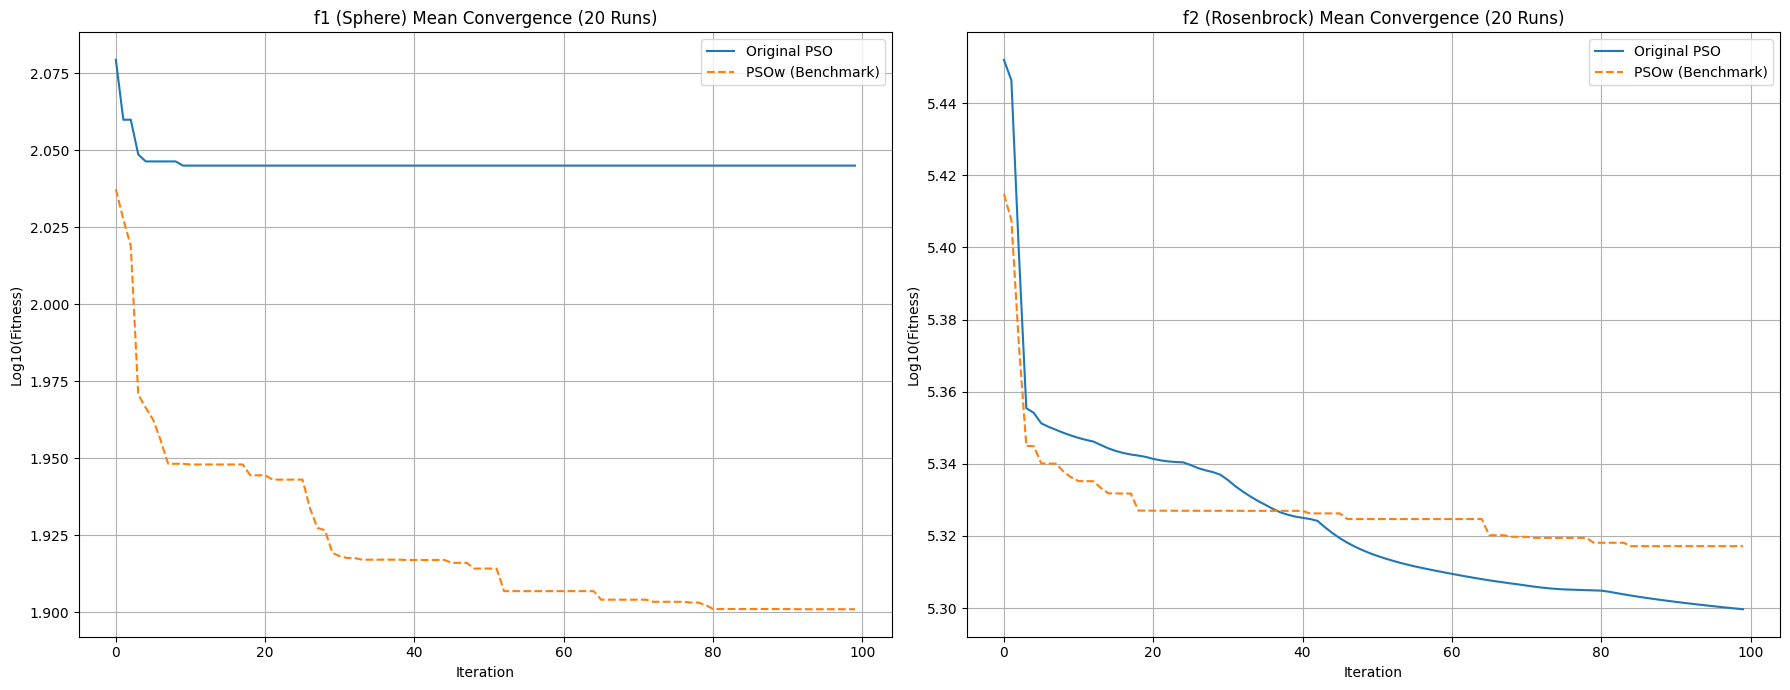

In [11]:
print("\n--- 6. Generating Convergence Plots ---")

# Suppress warnings for log(0) if fitness reaches zero
warnings.filterwarnings('ignore', r'divide by zero encountered in log10')

# Create a 1x2 plot (one for each function)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# --- Plot for f1 (Sphere) ---
# Calculate mean convergence curve from all 20 runs
mean_conv_pso_f1 = np.mean(convergence_data["original_pso"]["f1_sphere"], axis=0)
mean_conv_psow_f1 = np.mean(convergence_data["psow"]["f1_sphere"], axis=0)

ax1.plot(np.log10(mean_conv_pso_f1), label="Original PSO")
ax1.plot(np.log10(mean_conv_psow_f1), label="PSOw (Benchmark)", linestyle='--')
ax1.set_title("f1 (Sphere) Mean Convergence (20 Runs)")
ax1.set_xlabel("Iteration")
ax1.set_ylabel("Log10(Fitness)")
ax1.legend()
ax1.grid(True)

# --- Plot for f2 (Rosenbrock) ---
# Calculate mean convergence curve from all 20 runs
mean_conv_pso_f2 = np.mean(convergence_data["original_pso"]["f2_rosenbrock"], axis=0)
mean_conv_psow_f2 = np.mean(convergence_data["psow"]["f2_rosenbrock"], axis=0)

ax2.plot(np.log10(mean_conv_pso_f2), label="Original PSO")
ax2.plot(np.log10(mean_conv_psow_f2), label="PSOw (Benchmark)", linestyle='--')
ax2.set_title("f2 (Rosenbrock) Mean Convergence (20 Runs)")
ax2.set_xlabel("Iteration")
ax2.set_ylabel("Log10(Fitness)")
ax2.legend()
ax2.grid(True)

# Save and show the plot
plt.tight_layout()
plt.savefig("Experiment2_Convergence_Plots.png")
print("Convergence plots saved to 'Experiment2_Convergence_Plots.png'")
plt.show()